In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import pymongo

* **E**xtract: your original data sources and how the data was formatted (CSV, JSON, MySQL, etc).

* **T**ransform: what data cleaning or transformation was required.

* **L**oad: the final database, tables/collections, and why this was chosen.

<b>EXTRACT</b>
Data sources -
Federal Disasters by year by kaggle downloading csv using pandas
https://www.kaggle.com/fema/federal-disasters

Marriage Rates by state from data.world downloading csv using pandas
https://data.world/siyeh/state-marriage-rate/workspace/file?filename=state_marriage_rates_90_95_99-16.xlsx


In [104]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [105]:
disasters_df = pd.read_csv("data/database.csv")
marriages_df = pd.read_csv("data/state_marriage_rates.csv")

<b>TRANSFORM</b>

BELOW WE START TRANSFORMING TIMES AND STATE ABBREVIATIONS AND JOIN DATA INTO ONE DATAFRAME

In [106]:
disasters_df['Year'] = pd.to_datetime(disasters_df['Start Date']).dt.strftime('%Y')
disasters_df['Year'] = pd.to_numeric(disasters_df['Year'], errors='coerce')
disasters_df.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,Year
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes,1953
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes,1953
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes,1953
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes,1953
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes,1953


In [107]:
disasters_df.loc[disasters_df['Year'] > 1989]


,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,Year
9437,DR-852,Disaster,01/18/1990,WA,Benton County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9438,DR-852,Disaster,01/18/1990,WA,Grays Harbor County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9439,DR-852,Disaster,01/18/1990,WA,King County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9440,DR-852,Disaster,01/18/1990,WA,Lewis County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9441,DR-852,Disaster,01/18/1990,WA,Pierce County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9442,DR-852,Disaster,01/18/1990,WA,Thurston County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9443,DR-852,Disaster,01/18/1990,WA,Wahkiakum County,Flood,Severe Storms and Flooding,01/06/1990,01/14/1990,04/09/1998,Yes,No,Yes,Yes,1990
9444,DR-853,Disaster,01/24/1990,OR,Clatsop County,Flood,Severe Storms and Flooding,01/06/1990,01/09/1990,10/22/1999,No,No,Yes,Yes,1990
9445,DR-853,Disaster,01/24/1990,OR,Tillamook County,Flood,Severe Storms and Flooding,01/06/1990,01/09/1990,10/22/1999,No,No,Yes,Yes,1990
9446,DR-854,Disaster,02/05/1990,MP,Northern Islands Municipality,Typhoon,Typhoon Koryn,01/15/1990,01/16/1990,04/12/1999,No,No,Yes,Yes,1990


In [108]:
marriages_df.head()


,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [109]:
columns = ['State', 'Year', 'MarriagePercentage', 'CountOfDisasters']
newDf = pd.DataFrame(columns=columns)
for index, row in marriages_df.iterrows():
    
    for year in marriages_df:
        if (year != "State" and row.State != "District of Columbia"):
            count = len(disasters_df[(disasters_df['State'] == us_state_abbrev[row.State]) & (disasters_df['Year'] == int(year))])
            data.head()
            marriagePercentage = row[year]
            newDf = newDf.append({'State': row.State, 'Year': year, 'MarriagePercentage': row[year], 'CountOfDisasters': count}, ignore_index=True)

        
    

In [110]:
newDf.head()

,State,Year,MarriagePercentage,CountOfDisasters
0,Alabama,2016,7.1,0
1,Alabama,2015,7.4,39
2,Alabama,2014,7.8,21
3,Alabama,2013,7.8,0
4,Alabama,2012,8.2,11


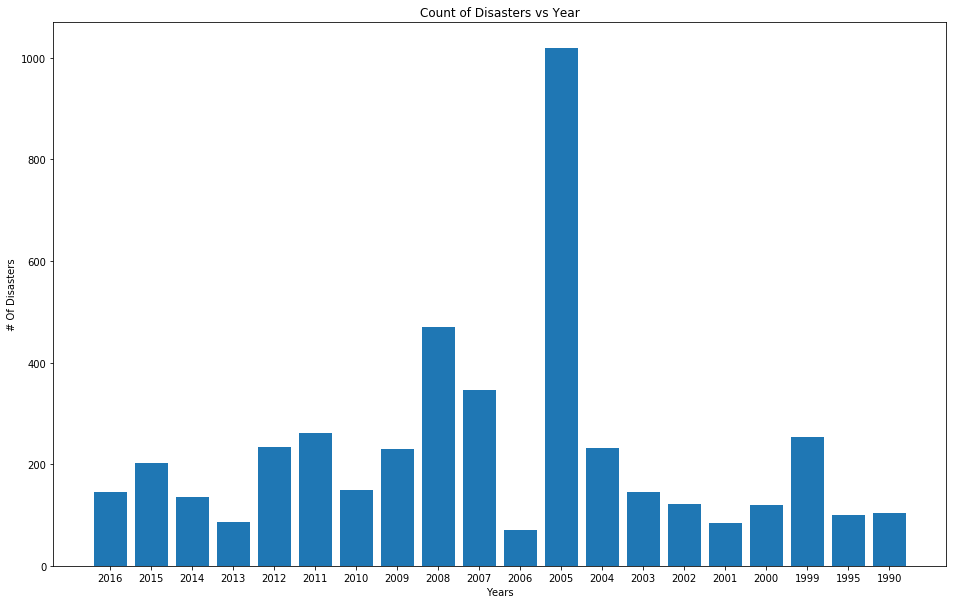

In [111]:
plt.figure(figsize=(16,10))
newDfX = newDf['Year']
newDfY = newDf['CountOfDisasters']
plt.title("Count of Disasters vs Year")
plt.xlabel("Years")
plt.ylabel("# Of Disasters")
plt.bar(newDfX, newDfY)

plt.show()

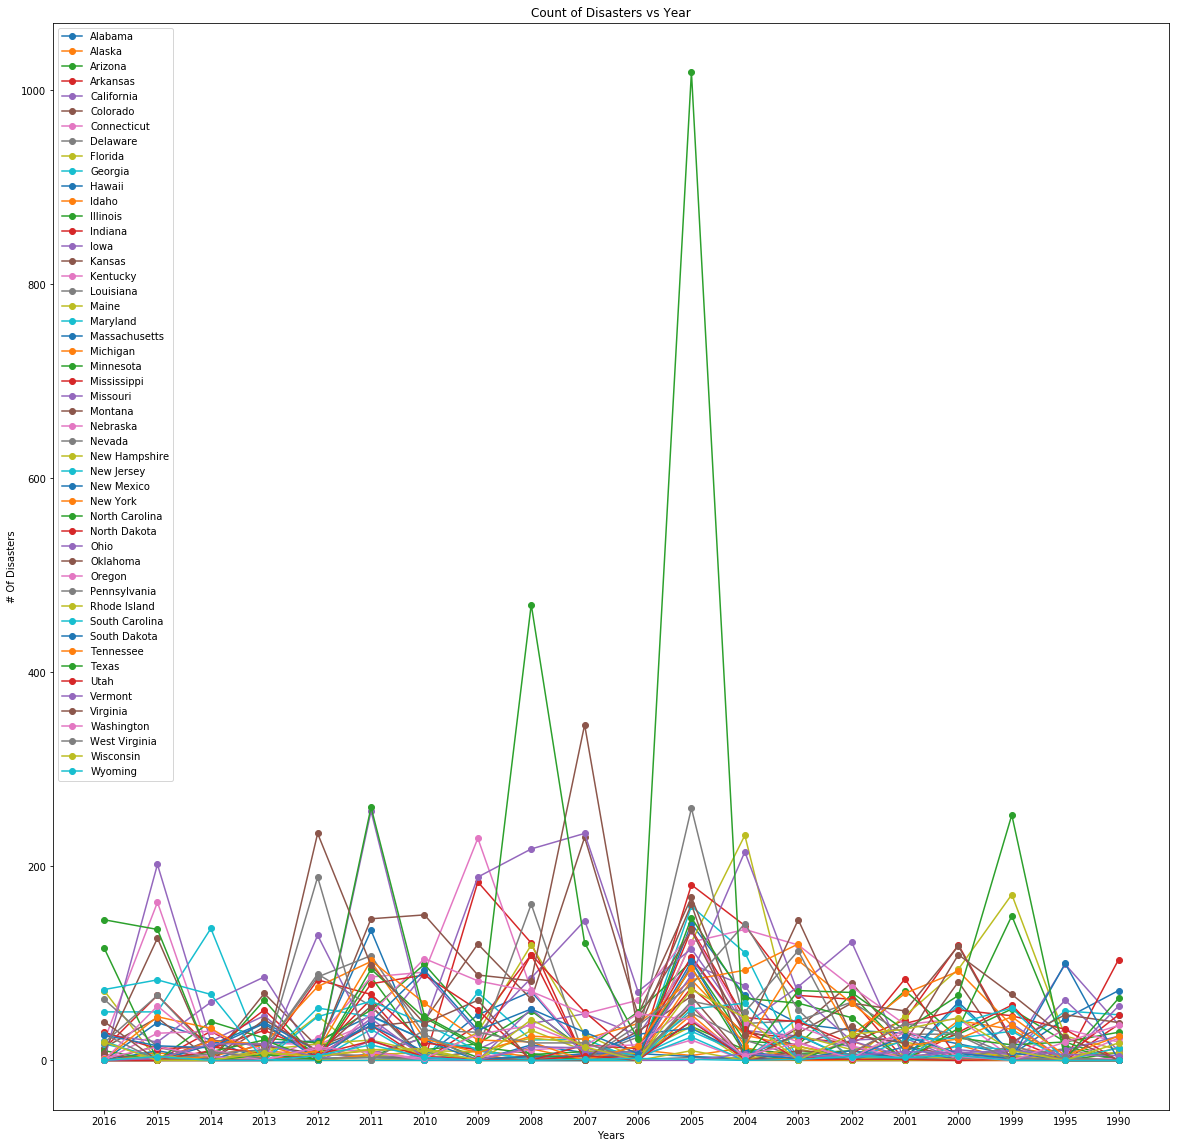

In [112]:

plt.figure(figsize=(20,20))
newDfX = newDf['Year']
newDfY = newDf['CountOfDisasters']
plt.title("Count of Disasters vs Year")
plt.xlabel("Years")
plt.ylabel("# Of Disasters")

for index, row in marriages_df.iterrows():
        if ( row.State != "District of Columbia"):
            stateDf = newDf.loc[newDf['State'] == row.State]
            plt.plot(stateDf['Year'], stateDf['CountOfDisasters'], marker='o', markersize=6, label = row.State)

plt.legend(loc='upper left')

plt.show()

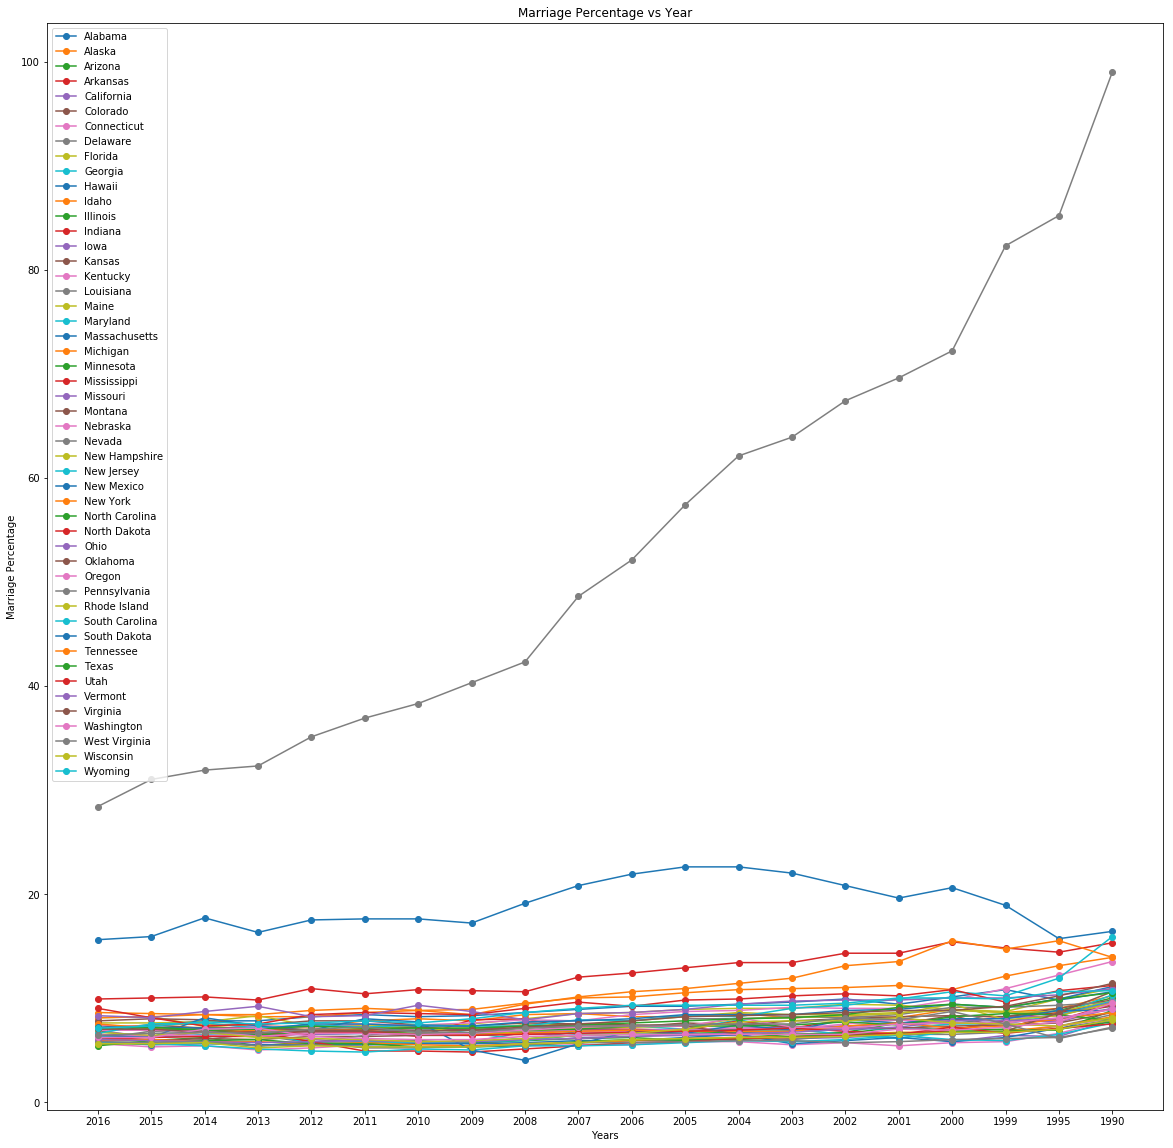

In [113]:


plt.figure(figsize=(20,20))
newDfX = newDf['Year']
newDfY = newDf['MarriagePercentage']
plt.title("Marriage Percentage vs Year")
plt.xlabel("Years")
plt.ylabel("Marriage Percentage")

for index, row in marriages_df.iterrows():
        if ( row.State != "District of Columbia"):
            stateDf = newDf.loc[newDf['State'] == row.State]
            plt.plot(stateDf['Year'], stateDf['MarriagePercentage'], marker='o', markersize=6, label = row.State)

plt.legend(loc='upper left')

plt.show()

<b> LOAD </b>
WE LOAD THE DATA INTO MONGO CLIENT AND STORE FOR FURTHER USE LATER ON AND STORAGE

In [114]:
import json
client = pymongo.MongoClient("localhost", 27017)
db = client.marriage_events_db
records = json.loads(newDf.T.to_json()).values()
db.marriage_events.insert_many(records)



In [115]:
from pprint import pprint

cursor = db.marriage_events.find({})
for document in cursor: 
    pprint(document)

{'CountOfDisasters': 0,
 'MarriagePercentage': 7.1,
 'State': 'Alabama',
 'Year': '2016',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c2')}
{'CountOfDisasters': 39,
 'MarriagePercentage': 7.4,
 'State': 'Alabama',
 'Year': '2015',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c3')}
{'CountOfDisasters': 21,
 'MarriagePercentage': 7.8,
 'State': 'Alabama',
 'Year': '2014',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c4')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.8,
 'State': 'Alabama',
 'Year': '2013',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c5')}
{'CountOfDisasters': 11,
 'MarriagePercentage': 8.2,
 'State': 'Alabama',
 'Year': '2012',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c6')}
{'CountOfDisasters': 134,
 'MarriagePercentage': 8.4,
 'State': 'Alabama',
 'Year': '2011',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c7')}
{'CountOfDisasters': 3,
 'MarriagePercentage': 8.2,
 'State': 'Alabama',
 'Year': '2010',
 '_id': ObjectId('5c5cf6acd5e9572ec81352c8')}
{'CountOfDisasters': 47,
 'MarriagePercenta

{'CountOfDisasters': 70,
 'MarriagePercentage': 6.6,
 'State': 'Georgia',
 'Year': '2009',
 '_id': ObjectId('5c5cf6acd5e9572ec813537d')}
{'CountOfDisasters': 21,
 'MarriagePercentage': 6.0,
 'State': 'Georgia',
 'Year': '2008',
 '_id': ObjectId('5c5cf6acd5e9572ec813537e')}
{'CountOfDisasters': 22,
 'MarriagePercentage': 6.8,
 'State': 'Georgia',
 'Year': '2007',
 '_id': ObjectId('5c5cf6acd5e9572ec813537f')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.3,
 'State': 'Georgia',
 'Year': '2006',
 '_id': ObjectId('5c5cf6acd5e9572ec8135380')}
{'CountOfDisasters': 159,
 'MarriagePercentage': 7.0,
 'State': 'Georgia',
 'Year': '2005',
 '_id': ObjectId('5c5cf6acd5e9572ec8135381')}
{'CountOfDisasters': 111,
 'MarriagePercentage': 7.9,
 'State': 'Georgia',
 'Year': '2004',
 '_id': ObjectId('5c5cf6acd5e9572ec8135382')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.0,
 'State': 'Georgia',
 'Year': '2003',
 '_id': ObjectId('5c5cf6acd5e9572ec8135383')}
{'CountOfDisasters': 0,
 'MarriagePercent

 'State': 'Kentucky',
 'Year': '2013',
 '_id': ObjectId('5c5cf6acd5e9572ec8135405')}
{'CountOfDisasters': 23,
 'MarriagePercentage': 7.2,
 'State': 'Kentucky',
 'Year': '2012',
 '_id': ObjectId('5c5cf6acd5e9572ec8135406')}
{'CountOfDisasters': 86,
 'MarriagePercentage': 7.5,
 'State': 'Kentucky',
 'Year': '2011',
 '_id': ObjectId('5c5cf6acd5e9572ec8135407')}
{'CountOfDisasters': 91,
 'MarriagePercentage': 7.4,
 'State': 'Kentucky',
 'Year': '2010',
 '_id': ObjectId('5c5cf6acd5e9572ec8135408')}
{'CountOfDisasters': 229,
 'MarriagePercentage': 7.6,
 'State': 'Kentucky',
 'Year': '2009',
 '_id': ObjectId('5c5cf6acd5e9572ec8135409')}
{'CountOfDisasters': 73,
 'MarriagePercentage': 7.9,
 'State': 'Kentucky',
 'Year': '2008',
 '_id': ObjectId('5c5cf6acd5e9572ec813540a')}
{'CountOfDisasters': 9,
 'MarriagePercentage': 7.8,
 'State': 'Kentucky',
 'Year': '2007',
 '_id': ObjectId('5c5cf6acd5e9572ec813540b')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 8.4,
 'State': 'Kentucky',
 'Year': '200

{'CountOfDisasters': 62,
 'MarriagePercentage': 8.3,
 'State': 'Missouri',
 'Year': '1995',
 '_id': ObjectId('5c5cf6acd5e9572ec81354b4')}
{'CountOfDisasters': 10,
 'MarriagePercentage': 9.6,
 'State': 'Missouri',
 'Year': '1990',
 '_id': ObjectId('5c5cf6acd5e9572ec81354b5')}
{'CountOfDisasters': 6,
 'MarriagePercentage': 7.8,
 'State': 'Montana',
 'Year': '2016',
 '_id': ObjectId('5c5cf6acd5e9572ec81354b6')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 8.0,
 'State': 'Montana',
 'Year': '2015',
 '_id': ObjectId('5c5cf6acd5e9572ec81354b7')}
{'CountOfDisasters': 21,
 'MarriagePercentage': 7.9,
 'State': 'Montana',
 'Year': '2014',
 '_id': ObjectId('5c5cf6acd5e9572ec81354b8')}
{'CountOfDisasters': 15,
 'MarriagePercentage': 7.4,
 'State': 'Montana',
 'Year': '2013',
 '_id': ObjectId('5c5cf6acd5e9572ec81354b9')}
{'CountOfDisasters': 7,
 'MarriagePercentage': 7.8,
 'State': 'Montana',
 'Year': '2012',
 '_id': ObjectId('5c5cf6acd5e9572ec81354ba')}
{'CountOfDisasters': 56,
 'MarriagePercent

{'CountOfDisasters': 36,
 'MarriagePercentage': 7.3,
 'State': 'New York',
 'Year': '1999',
 '_id': ObjectId('5c5cf6acd5e9572ec813553f')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 8.0,
 'State': 'New York',
 'Year': '1995',
 '_id': ObjectId('5c5cf6acd5e9572ec8135540')}
{'CountOfDisasters': 13,
 'MarriagePercentage': 8.6,
 'State': 'New York',
 'Year': '1990',
 '_id': ObjectId('5c5cf6acd5e9572ec8135541')}
{'CountOfDisasters': 116,
 'MarriagePercentage': 7.0,
 'State': 'North Carolina',
 'Year': '2016',
 '_id': ObjectId('5c5cf6acd5e9572ec8135542')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.0,
 'State': 'North Carolina',
 'Year': '2015',
 '_id': ObjectId('5c5cf6acd5e9572ec8135543')}
{'CountOfDisasters': 9,
 'MarriagePercentage': 6.9,
 'State': 'North Carolina',
 'Year': '2014',
 '_id': ObjectId('5c5cf6acd5e9572ec8135544')}
{'CountOfDisasters': 21,
 'MarriagePercentage': 6.5,
 'State': 'North Carolina',
 'Year': '2013',
 '_id': ObjectId('5c5cf6acd5e9572ec8135545')}
{'CountOfDis

 '_id': ObjectId('5c5cf6acd5e9572ec81355cb')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.3,
 'State': 'Rhode Island',
 'Year': '1995',
 '_id': ObjectId('5c5cf6acd5e9572ec81355cc')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 8.1,
 'State': 'Rhode Island',
 'Year': '1990',
 '_id': ObjectId('5c5cf6acd5e9572ec81355cd')}
{'CountOfDisasters': 73,
 'MarriagePercentage': 6.6,
 'State': 'South Carolina',
 'Year': '2016',
 '_id': ObjectId('5c5cf6acd5e9572ec81355ce')}
{'CountOfDisasters': 83,
 'MarriagePercentage': 7.5,
 'State': 'South Carolina',
 'Year': '2015',
 '_id': ObjectId('5c5cf6acd5e9572ec81355cf')}
{'CountOfDisasters': 68,
 'MarriagePercentage': 7.6,
 'State': 'South Carolina',
 'Year': '2014',
 '_id': ObjectId('5c5cf6acd5e9572ec81355d0')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.1,
 'State': 'South Carolina',
 'Year': '2013',
 '_id': ObjectId('5c5cf6acd5e9572ec81355d1')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 7.4,
 'State': 'South Carolina',
 'Year': '2012',


 'Year': '1990',
 '_id': ObjectId('5c5cf6acd5e9572ec8135681')}
{'CountOfDisasters': 19,
 'MarriagePercentage': 5.6,
 'State': 'Wisconsin',
 'Year': '2016',
 '_id': ObjectId('5c5cf6acd5e9572ec8135682')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 5.6,
 'State': 'Wisconsin',
 'Year': '2015',
 '_id': ObjectId('5c5cf6acd5e9572ec8135683')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 5.7,
 'State': 'Wisconsin',
 'Year': '2014',
 '_id': ObjectId('5c5cf6acd5e9572ec8135684')}
{'CountOfDisasters': 8,
 'MarriagePercentage': 5.2,
 'State': 'Wisconsin',
 'Year': '2013',
 '_id': ObjectId('5c5cf6acd5e9572ec8135685')}
{'CountOfDisasters': 4,
 'MarriagePercentage': 5.4,
 'State': 'Wisconsin',
 'Year': '2012',
 '_id': ObjectId('5c5cf6acd5e9572ec8135686')}
{'CountOfDisasters': 11,
 'MarriagePercentage': 5.3,
 'State': 'Wisconsin',
 'Year': '2011',
 '_id': ObjectId('5c5cf6acd5e9572ec8135687')}
{'CountOfDisasters': 12,
 'MarriagePercentage': 5.3,
 'State': 'Wisconsin',
 'Year': '2010',
 '_id': Object

 'MarriagePercentage': 5.7,
 'State': 'Delaware',
 'Year': '2015',
 '_id': ObjectId('5c5cf868d5e9572ec8135738')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 6.0,
 'State': 'Delaware',
 'Year': '2014',
 '_id': ObjectId('5c5cf868d5e9572ec8135739')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 6.6,
 'State': 'Delaware',
 'Year': '2013',
 '_id': ObjectId('5c5cf868d5e9572ec813573a')}
{'CountOfDisasters': 6,
 'MarriagePercentage': 5.8,
 'State': 'Delaware',
 'Year': '2012',
 '_id': ObjectId('5c5cf868d5e9572ec813573b')}
{'CountOfDisasters': 5,
 'MarriagePercentage': 5.2,
 'State': 'Delaware',
 'Year': '2011',
 '_id': ObjectId('5c5cf868d5e9572ec813573c')}
{'CountOfDisasters': 3,
 'MarriagePercentage': 5.2,
 'State': 'Delaware',
 'Year': '2010',
 '_id': ObjectId('5c5cf868d5e9572ec813573d')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 5.4,
 'State': 'Delaware',
 'Year': '2009',
 '_id': ObjectId('5c5cf868d5e9572ec813573e')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 5.5,
 'State': 'De

{'CountOfDisasters': 0,
 'MarriagePercentage': 7.3,
 'State': 'Kentucky',
 'Year': '2013',
 '_id': ObjectId('5c5cf868d5e9572ec81357ee')}
{'CountOfDisasters': 23,
 'MarriagePercentage': 7.2,
 'State': 'Kentucky',
 'Year': '2012',
 '_id': ObjectId('5c5cf868d5e9572ec81357ef')}
{'CountOfDisasters': 86,
 'MarriagePercentage': 7.5,
 'State': 'Kentucky',
 'Year': '2011',
 '_id': ObjectId('5c5cf868d5e9572ec81357f0')}
{'CountOfDisasters': 91,
 'MarriagePercentage': 7.4,
 'State': 'Kentucky',
 'Year': '2010',
 '_id': ObjectId('5c5cf868d5e9572ec81357f1')}
{'CountOfDisasters': 229,
 'MarriagePercentage': 7.6,
 'State': 'Kentucky',
 'Year': '2009',
 '_id': ObjectId('5c5cf868d5e9572ec81357f2')}
{'CountOfDisasters': 73,
 'MarriagePercentage': 7.9,
 'State': 'Kentucky',
 'Year': '2008',
 '_id': ObjectId('5c5cf868d5e9572ec81357f3')}
{'CountOfDisasters': 9,
 'MarriagePercentage': 7.8,
 'State': 'Kentucky',
 'Year': '2007',
 '_id': ObjectId('5c5cf868d5e9572ec81357f4')}
{'CountOfDisasters': 0,
 'MarriageP

 '_id': ObjectId('5c5cf868d5e9572ec81358a3')}
{'CountOfDisasters': 56,
 'MarriagePercentage': 7.8,
 'State': 'Montana',
 'Year': '2011',
 '_id': ObjectId('5c5cf868d5e9572ec81358a4')}
{'CountOfDisasters': 3,
 'MarriagePercentage': 7.4,
 'State': 'Montana',
 'Year': '2010',
 '_id': ObjectId('5c5cf868d5e9572ec81358a5')}
{'CountOfDisasters': 1,
 'MarriagePercentage': 7.3,
 'State': 'Montana',
 'Year': '2009',
 '_id': ObjectId('5c5cf868d5e9572ec81358a6')}
{'CountOfDisasters': 4,
 'MarriagePercentage': 7.6,
 'State': 'Montana',
 'Year': '2008',
 '_id': ObjectId('5c5cf868d5e9572ec81358a7')}
{'CountOfDisasters': 4,
 'MarriagePercentage': 7.5,
 'State': 'Montana',
 'Year': '2007',
 '_id': ObjectId('5c5cf868d5e9572ec81358a8')}
{'CountOfDisasters': 4,
 'MarriagePercentage': 7.4,
 'State': 'Montana',
 'Year': '2006',
 '_id': ObjectId('5c5cf868d5e9572ec81358a9')}
{'CountOfDisasters': 56,
 'MarriagePercentage': 7.4,
 'State': 'Montana',
 'Year': '2005',
 '_id': ObjectId('5c5cf868d5e9572ec81358aa')}


 'Year': '2010',
 '_id': ObjectId('5c5cf868d5e9572ec8135959')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 5.8,
 'State': 'Ohio',
 'Year': '2009',
 '_id': ObjectId('5c5cf868d5e9572ec813595a')}
{'CountOfDisasters': 53,
 'MarriagePercentage': 6.0,
 'State': 'Ohio',
 'Year': '2008',
 '_id': ObjectId('5c5cf868d5e9572ec813595b')}
{'CountOfDisasters': 8,
 'MarriagePercentage': 6.1,
 'State': 'Ohio',
 'Year': '2007',
 '_id': ObjectId('5c5cf868d5e9572ec813595c')}
{'CountOfDisasters': 9,
 'MarriagePercentage': 6.3,
 'State': 'Ohio',
 'Year': '2006',
 '_id': ObjectId('5c5cf868d5e9572ec813595d')}
{'CountOfDisasters': 88,
 'MarriagePercentage': 6.5,
 'State': 'Ohio',
 'Year': '2005',
 '_id': ObjectId('5c5cf868d5e9572ec813595e')}
{'CountOfDisasters': 215,
 'MarriagePercentage': 6.6,
 'State': 'Ohio',
 'Year': '2004',
 '_id': ObjectId('5c5cf868d5e9572ec813595f')}
{'CountOfDisasters': 69,
 'MarriagePercentage': 6.7,
 'State': 'Ohio',
 'Year': '2003',
 '_id': ObjectId('5c5cf868d5e9572ec8135960')}
{

 'State': 'Utah',
 'Year': '2008',
 '_id': ObjectId('5c5cf868d5e9572ec8135a0f')}
{'CountOfDisasters': 5,
 'MarriagePercentage': 9.6,
 'State': 'Utah',
 'Year': '2007',
 '_id': ObjectId('5c5cf868d5e9572ec8135a10')}
{'CountOfDisasters': 0,
 'MarriagePercentage': 9.2,
 'State': 'Utah',
 'Year': '2006',
 '_id': ObjectId('5c5cf868d5e9572ec8135a11')}
{'CountOfDisasters': 41,
 'MarriagePercentage': 9.8,
 'State': 'Utah',
 'Year': '2005',
 '_id': ObjectId('5c5cf868d5e9572ec8135a12')}
{'CountOfDisasters': 1,
 'MarriagePercentage': 9.9,
 'State': 'Utah',
 'Year': '2004',
 '_id': ObjectId('5c5cf868d5e9572ec8135a13')}
{'CountOfDisasters': 1,
 'MarriagePercentage': 10.2,
 'State': 'Utah',
 'Year': '2003',
 '_id': ObjectId('5c5cf868d5e9572ec8135a14')}
{'CountOfDisasters': 1,
 'MarriagePercentage': 10.4,
 'State': 'Utah',
 'Year': '2002',
 '_id': ObjectId('5c5cf868d5e9572ec8135a15')}
{'CountOfDisasters': 1,
 'MarriagePercentage': 10.2,
 'State': 'Utah',
 'Year': '2001',
 '_id': ObjectId('5c5cf868d5e9

<b> Conclusions </b>
* We've noticed that Nevada is a huge outlier with the percentage of the population having a huge marriage rate. We need to remember many people travel here to get married once and then leave back out of state so a lot more marriages happen here.
* 2005 Had the most amount of natural disasters by far declared by government officials in the United States
* Comparing the two we do not necessarily see a correlation but you can see a little bump around the 2005 time frame when there was all those disasters.
* This was still very interesting to compare these 2 factors from 2 different sources and could not have been completed without pandas, matplot, and pymongo to store the data in database for further use